## heart failure prediction

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#as it is a classification project
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv(r"D:\dataset AIML\heart_failure_prediction\heart_failure_clinical_records.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [6]:
#chech missing value
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
#dividing the data into input and target feature
x= df.drop(columns = ['DEATH_EVENT'])
y=df['DEATH_EVENT']

In [9]:
y

0       0
1       0
2       0
3       0
4       1
       ..
4995    0
4996    0
4997    1
4998    1
4999    0
Name: DEATH_EVENT, Length: 5000, dtype: int64

In [15]:
#data normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x[:]=scaler.fit_transform(x)

In [16]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.272727,0,0.092498,0,0.469697,0,0.288833,0.089888,0.685714,1,1,0.298932
1,0.454545,0,0.004210,0,0.166667,0,0.339314,0.505618,0.485714,1,0,0.722420
2,0.090909,0,0.071319,1,0.363636,0,0.356286,0.044944,0.771429,0,0,0.854093
3,0.363636,1,0.093264,1,0.393939,1,0.367196,0.078652,0.371429,1,0,0.306050
4,1.000000,1,0.071319,0,0.242424,0,0.528428,0.168539,0.542857,1,0,0.163701


In [17]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42)

In [18]:
x_train.shape , x_test.shape

((4000, 12), (1000, 12))

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [23]:
def kfold(estimation , input , target):
    return cross_val_score(estimation,input,target).mean()*100

In [24]:
kfold(LogisticRegression(),x_train,y_train)

85.25

In [26]:
kfold(SVC(),x_train,y_train)

89.525

In [27]:
kfold(RandomForestClassifier(),x_train,y_train)

99.14999999999999

In [28]:
#for choosing the best hyper parameter for model
clf = GridSearchCV(RandomForestClassifier(),{
    'n_estimators':[50,100,150],
    'max_depth':[3,5,7],
    'min_samples_split':[2,3,4]
})
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]})

In [29]:
clf_df = pd.DataFrame(clf.cv_results_)

In [30]:
clf_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [32]:
clf_df[['param_max_depth', 'param_min_samples_split', 'param_n_estimators','mean_test_score']].sort_values(by='mean_test_score',ascending=False)

,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score
22,7,3,100,0.98150
24,7,4,50,0.98075
21,7,3,50,0.97975
18,7,2,50,0.97925
26,7,4,150,0.97875
23,7,3,150,0.97875
20,7,2,150,0.97875
19,7,2,100,0.97675
25,7,4,100,0.97650
16,5,4,100,0.94700


In [33]:
# so we will go ahead by random forest classifier
model = RandomForestClassifier(n_jobs=1,
                              n_estimators=100,
                              max_depth=7,
                              min_samples_split=3)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=3, n_jobs=1)

In [34]:
y_test[:5]

1501    0
2586    1
2653    1
1055    1
705     0
Name: DEATH_EVENT, dtype: int64

In [35]:
pred = model.predict(x_test)
pred[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [36]:
accuracy_score(y_test,pred)*100

97.2

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       698
           1       0.98      0.93      0.95       302

    accuracy                           0.97      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [38]:
#as f1 score for both 0 and 1 is similar and doesnt have drstic difference so we can say that dataset is balanced

Text(50.722222222222214, 0.5, 'actual')

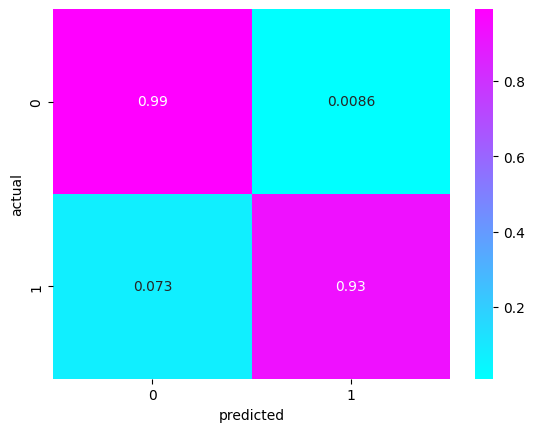

In [39]:
#print confusion matrix
cf = confusion_matrix(y_test,pred,normalize='true')
sns.heatmap(cf,annot=True,cmap='cool')

plt.xlabel('predicted')
plt.ylabel('actual')